In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
static_cb = pd.read_csv('/kaggle/input/home-credit-credit-risk-model-stability/csv_files/train/train_static_cb_0.csv')
static_cb.head()

/tmp/ipykernel_33/1503488160.py:1: DtypeWarning: Columns (1,2,3,4,7,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  static_cb = pd.read_csv('/kaggle/input/home-credit-credit-risk-model-stability/csv_files/train/train_static_cb_0.csv')


,case_id,assignmentdate_238D,assignmentdate_4527235D,assignmentdate_4955616D,birthdate_574D,contractssum_5085716L,dateofbirth_337D,dateofbirth_342D,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,description_5085714M,education_1103M,education_88M,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
0,357,NaN,NaN,NaN,1988-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a55475b1,a55475b1,a55475b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a55475b1,a55475b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6301.4000,NaN,2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN
1,381,NaN,NaN,NaN,1973-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a55475b1,a55475b1,a55475b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a55475b1,a55475b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,4019.6000,NaN,2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN
2,388,NaN,NaN,NaN,1989-04-01,NaN,1989-04-01,NaN,6.0,8.0,2.0,10.0,4.0,a55475b1,a55475b1,a55475b1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,a55475b1,a55475b1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,14548.0000,NaN,2019-01-28,NaN,NaN,NaN,NaN,3.0,5.0
3,405,NaN,NaN,NaN,1974-03-01,NaN,1974-03-01,NaN,0.0,0.0,0.0,1.0,0.0,a55475b1,a55475b1,a55475b1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,a55475b1,a55475b1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10498.2400,NaN,2019-01-21,NaN,NaN,NaN,NaN,2.0,0.0
4,409,NaN,NaN,NaN,1993-06-01,NaN,1993-06-01,NaN,2.0,3.0,0.0,3.0,1.0,a55475b1,717ddd49,a55475b1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,a7fcb6e5,a55475b1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6344.8804,NaN,2019-01-21,NaN,NaN,NaN,NaN,0.0,4.0


<Axes: >

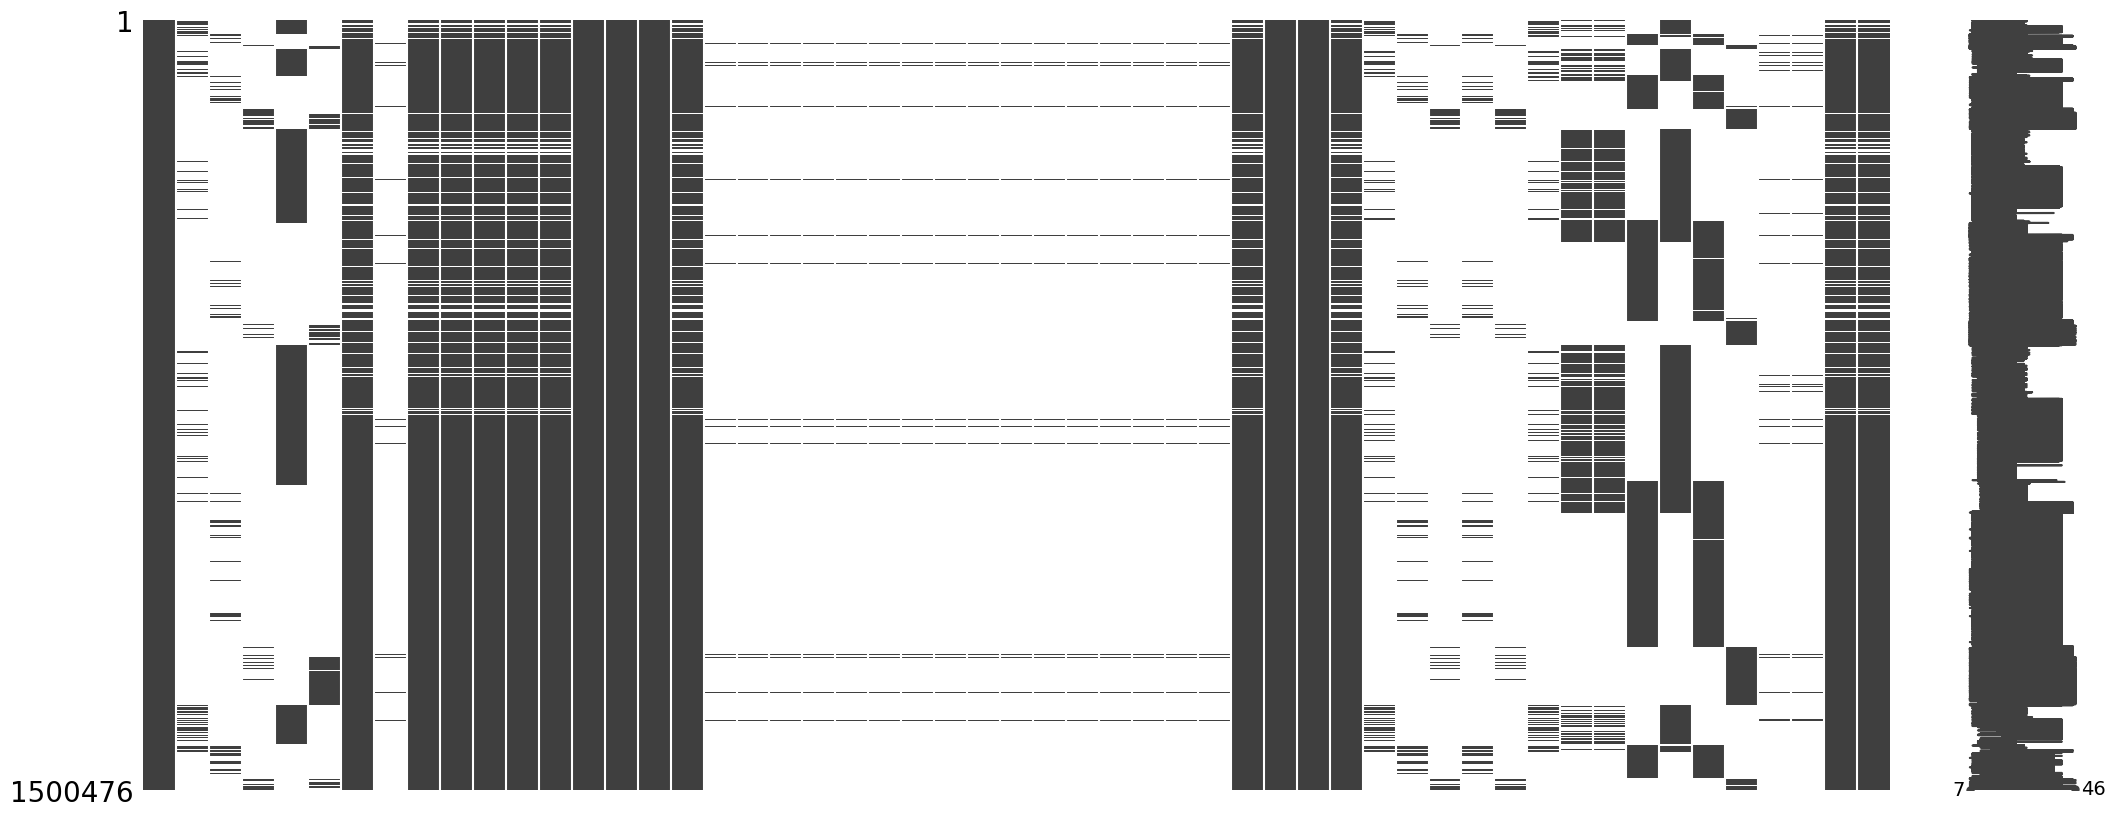

In [6]:
msno.matrix(static_cb)

In [7]:
static_cb.count()

case_id                    1500476
assignmentdate_238D         136996
assignmentdate_4527235D     114978
assignmentdate_4955616D      71633
birthdate_574D              607871
contractssum_5085716L       157329
dateofbirth_337D           1385691
dateofbirth_342D             36500
days120_123L               1385691
days180_256L               1385691
days30_165L                1385691
days360_512L               1385691
days90_310L                1385691
description_5085714M       1500476
education_1103M            1500476
education_88M              1500476
firstquarter_103L          1385691
for3years_128L               36514
for3years_504L               36514
for3years_584L               36514
formonth_118L                36514
formonth_206L                36514
formonth_535L                36514
forquarter_1017L             36514
forquarter_462L              36514
forquarter_634L              36514
fortoday_1092L               36514
forweek_1077L                36514
forweek_528L        

In [8]:
data_dic = pd.read_csv('/kaggle/input/home-credit-credit-risk-model-stability/feature_definitions.csv')
data_dic.head()

,Variable,Description
0,actualdpd_943P,Days Past Due (DPD) of previous contract (actu...
1,actualdpdtolerance_344P,DPD of client with tolerance.
2,addres_district_368M,District of the person's address.
3,addres_role_871L,Role of person's address.
4,addres_zip_823M,Zip code of the address.


In [9]:
data_dic[data_dic['Variable'].isin(static_cb.columns)]

,Variable,Description
27,assignmentdate_238D,Tax authority data - date of assignment.
28,assignmentdate_4527235D,Tax authority data - Date of assignment.
29,assignmentdate_4955616D,Tax authority assignment date.
41,birthdate_574D,Client's date of birth (credit bureau data).
84,contractssum_5085716L,Total sum of values of contracts retrieved fro...
119,dateofbirth_337D,Client's date of birth.
120,dateofbirth_342D,Client's date of birth.
126,days120_123L,Number of credit bureau queries for the last 1...
127,days180_256L,Number of credit bureau queries for last 180 d...
128,days30_165L,Number of credit bureau queries for the last 3...
